In [1]:
#MAKE FIGURE

In [2]:
%load_ext autoreload
%load_ext line_profiler
%autoreload 2

import numpy as np
import pandas as pd
from mpl_toolkits import mplot3d
import matplotlib
import matplotlib.pyplot as plt
import scipy.optimize as optimize
import Estimate
import figure 
from EconModel import cpptools
import pickle

from LimitedCommitmentModel import LimitedCommitmentModelClass

# plot style
linestyles = ['-','--','-.',':',':']
markers = ['o','s','D','*','P']
linewidth = 2
font_size = 17
font = {'size':font_size}
matplotlib.rc('font', **font)


plt.rcParams.update({'figure.max_open_warning': 0,'text.usetex': False})
path = 'output/'

SAVE = False

# c++ settings

do_compile = True
threads = 20
T = 20
#cpptools.setup_nlopt(folder='cppfuncs/', do_print = True) #install nlopt


In [3]:
#LOAD PICKLE (SEPERETAE FILE )
name = 'LC'
N = 5000
S = 100

do_distr_yerror = "norm"
do_yerror = 1
pickle_file = f'output/TRUEmodel_{name}_w_N{N}_S{S}_{do_distr_yerror}{do_yerror}_testFC.pickle'
with open(pickle_file, 'rb') as f:
    TrueLC_testFC_woman = pickle.load(f)
pickle_file = f'output/TRUEmodel_{name}_w_N{N}_S{S}_{do_distr_yerror}{do_yerror}_testNC.pickle'
with open(pickle_file, 'rb') as f:
    TrueLC_testNC_woman = pickle.load(f)


N = 10000
name = 'FC'
pickle_file = f'output/TRUEmodel_{name}_w_N{N}_S{S}_{do_distr_yerror}{do_yerror}_testFC.pickle'
with open(pickle_file, 'rb') as f:
    TrueFC_testFC_woman = pickle.load(f)
pickle_file = f'output/TRUEmodel_{name}_w_N{N}_S{S}_{do_distr_yerror}{do_yerror}_testNC.pickle'
with open(pickle_file, 'rb') as f:
    TrueFC_testNC_woman = pickle.load(f)

N = 5000
name = 'NC'
pickle_file = f'output/TRUEmodel_{name}_w_N{N}_S{S}_{do_distr_yerror}{do_yerror}_testFC.pickle'
with open(pickle_file, 'rb') as f:
    TrueNC_testFC_woman = pickle.load(f)
pickle_file = f'output/TRUEmodel_{name}_w_N{N}_S{S}_{do_distr_yerror}{do_yerror}_testNC.pickle'
with open(pickle_file, 'rb') as f:
    TrueNC_testNC_woman = pickle.load(f)


print(TrueNC_testNC_woman.shape)

(4, 3, 2, 100)


In [4]:
def fig_density_trueworld(NC, FC, LC):
    hist, bins = np.histogram(NC, range = [0, 1], bins =20, density = True)
    hist = hist/20

    cumhist1 = np.cumsum(hist)


    hist, bins = np.histogram(FC, range = [0, 1], bins =20, density = True)
    hist = hist/20
    cumhist2 = np.cumsum(hist)


    hist, bins = np.histogram(LC, range = [0, 1], bins =20, density = True)
    hist = hist/20
    cumhist3 = np.cumsum(hist)



    plt.plot(bins[1:], cumhist1, label="NC")
    plt.plot(bins[1:], cumhist2, label="FC")
    plt.plot(bins[1:], cumhist3, label="LC")
    plt.plot(np.linspace(0.0,1.0, 10), np.linspace(0.0,1.0,10), label = "45 degree", color = 'red')
    plt.xlabel(f'P value for $H_0$')
    #plt.axvline(x= 0.05, color = 'red')
    plt.ylabel('Cumulative Density')
    plt.legend()
    plt.ylim(0,1.01)
    plt.xlim(0,1)
    #plt.savefig(f'output/Wald__TRUE{model_True}_{gender}_N{models.par.simN}_{save_fig}.png')
    plt.show()

def fig_density_est_wage(est_omega, true_omega, wage):
    hist, bins = np.histogram(est_omega, range = [0, 1], bins =20, density = True)
    hist = hist/20

    cumhist1 = np.cumsum(hist)


    hist, bins = np.histogram(true_omega, range = [0, 1], bins =20, density = True)
    hist = hist/20
    cumhist2 = np.cumsum(hist)


    hist, bins = np.histogram(wage, range = [0, 1], bins =20, density = True)
    hist = hist/20
    cumhist3 = np.cumsum(hist)



    plt.plot(bins[1:], cumhist1, label="est_omega")
    plt.plot(bins[1:], cumhist2, label="true_omega")
    plt.plot(bins[1:], cumhist3, label="wage")
    plt.plot(np.linspace(0.0,1.0, 10), np.linspace(0.0,1.0,10), label = "45 degree", color = 'red')
    plt.xlabel(f'P value for $H_0$')
    #plt.axvline(x= 0.05, color = 'red')
    plt.ylabel('Cumulative Density')
    plt.legend()
    plt.ylim(0,1.01)
    plt.xlim(0,1)
    #plt.savefig(f'output/Wald__TRUE{model_True}_{gender}_N{models.par.simN}_{save_fig}.png')
    plt.show()


def fig_density_love(w_love, without_love):
    hist, bins = np.histogram(w_love, range = [0, 1], bins =20, density = True)
    hist = hist/20

    cumhist1 = np.cumsum(hist)


    hist, bins = np.histogram(without_love, range = [0, 1], bins =20, density = True)
    hist = hist/20
    cumhist2 = np.cumsum(hist)




    plt.plot(bins[1:], cumhist1, label="with love")
    plt.plot(bins[1:], cumhist2, label="withour love")
    plt.plot(np.linspace(0.0,1.0, 10), np.linspace(0.0,1.0,10), label = "45 degree", color = 'red')
    plt.xlabel(f'P value for $H_0$')
    #plt.axvline(x= 0.05, color = 'red')
    plt.ylabel('Cumulative Density')
    plt.legend()
    plt.ylim(0,1.01)
    plt.xlim(0,1)
    #plt.savefig(f'output/Wald__TRUE{model_True}_{gender}_N{models.par.simN}_{save_fig}.png')
    plt.show()


def fig_density_shadow(simple_shadow, compl1, compl2, compl3):
    hist, bins = np.histogram(simple_shadow, range = [0, 1], bins =20, density = True)
    hist = hist/20

    cumhist1 = np.cumsum(hist)


    hist, bins = np.histogram(compl1, range = [0, 1], bins =20, density = True)
    hist = hist/20
    cumhist2 = np.cumsum(hist)


    hist, bins = np.histogram(compl2, range = [0, 1], bins =20, density = True)
    hist = hist/20
    cumhist3 = np.cumsum(hist)


    hist, bins = np.histogram(compl3, range = [0, 1], bins =20, density = True)
    hist = hist/20
    cumhist4 = np.cumsum(hist)


    plt.plot(bins[1:], cumhist1, label="simple shadow")
    plt.plot(bins[1:], cumhist2, label="compl 1")
    plt.plot(bins[1:], cumhist3, label="compl 2")
    plt.plot(bins[1:], cumhist4, label="compl3")
    plt.plot(np.linspace(0.0,1.0, 10), np.linspace(0.0,1.0,10), label = "45 degree", color = 'red')
    plt.xlabel(f'P value for $H_0$')
    #plt.axvline(x= 0.05, color = 'red')
    plt.ylabel('Cumulative Density')
    plt.legend()
    plt.ylim(0,1.01)
    plt.xlim(0,1)
    #plt.savefig(f'output/Wald__TRUE{model_True}_{gender}_N{models.par.simN}_{save_fig}.png')
    plt.show()





[2.29257242e-03 1.28825561e-01 5.62470367e-01 5.73562561e-01
 2.61393969e-01 6.40777985e-03 2.10874321e-02 9.94590970e-03
 2.56419738e-01 7.48730982e-03 2.75061377e-03 9.67674365e-01
 5.17388600e-02 2.37461148e-02 4.07601639e-02 6.72048923e-02
 3.70739064e-02 2.75852400e-02 1.16667610e-01 1.36650925e-01
 6.29604306e-03 3.49370786e-01 4.04677925e-01 2.92840656e-01
 2.70970414e-01 3.41051530e-01 1.35765419e-01 7.99377985e-02
 2.19173153e-02 1.00180236e-01 6.82049298e-01 8.30385368e-01
 5.66521444e-01 1.09767739e-01 8.37634850e-02 3.78050086e-01
 5.14927928e-01 2.03467961e-01 5.68153795e-01 1.92063284e-03
 1.31161651e-01 3.82887474e-02 2.42386957e-01 2.89213714e-05
 6.51174921e-04 3.43387088e-01 4.40686538e-02 1.70456800e-02
 4.10402814e-01 3.85921883e-03 4.42933272e-01 1.57441469e-01
 6.84510088e-01 3.99722671e-03 4.71362769e-02 2.27695370e-01
 1.28331164e-01 6.74403394e-02 2.55524725e-02 7.53429347e-02
 3.94973218e-04 3.76455440e-02 3.29641136e-01 8.59113866e-01
 3.02328861e-01 1.823573

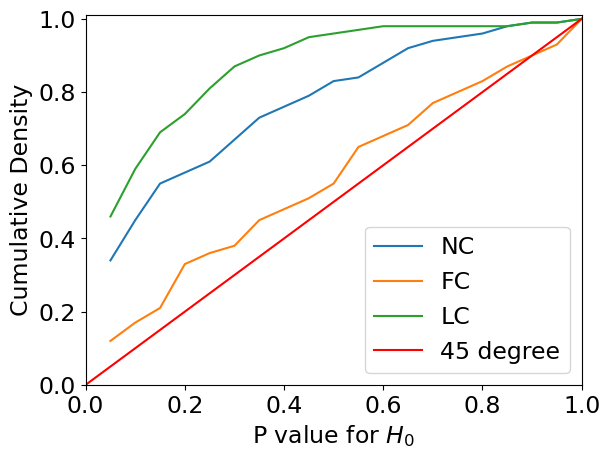

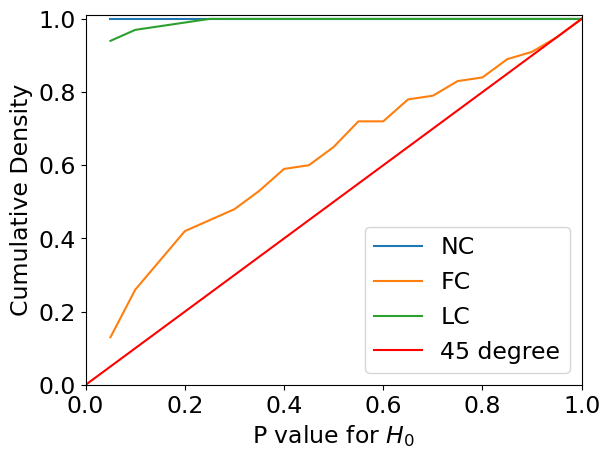

In [5]:
# TEST TRUE WORLD
j = 3   #est shadow
ik = 0  # est wage ["est_omega","true_omega", "wage"]
im = 0 #love True=0, false = 1
print( TrueNC_testNC_woman[j,ik,im,:])
print( TrueFC_testNC_woman[j,ik,im,:])
print( TrueLC_testNC_woman[j,ik,im,:])
fig_density_trueworld(TrueNC_testNC_woman[j,ik,im,:],TrueFC_testNC_woman[j,ik,im,:],TrueLC_testNC_woman[j,ik,im,:])
fig_density_trueworld(TrueNC_testFC_woman[j,ik,im,:],TrueFC_testFC_woman[j,ik,im,:],TrueLC_testFC_woman[j,ik,im,:])

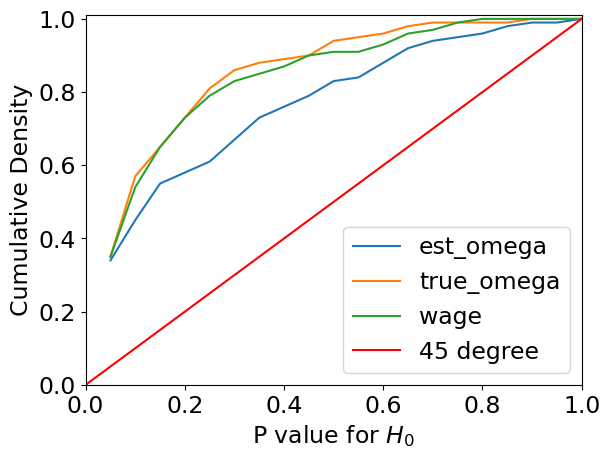

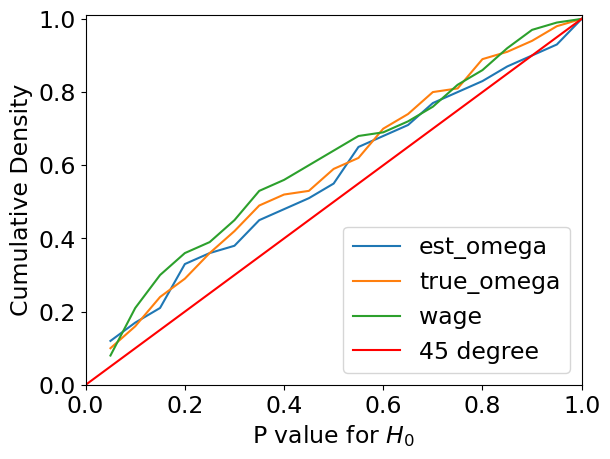

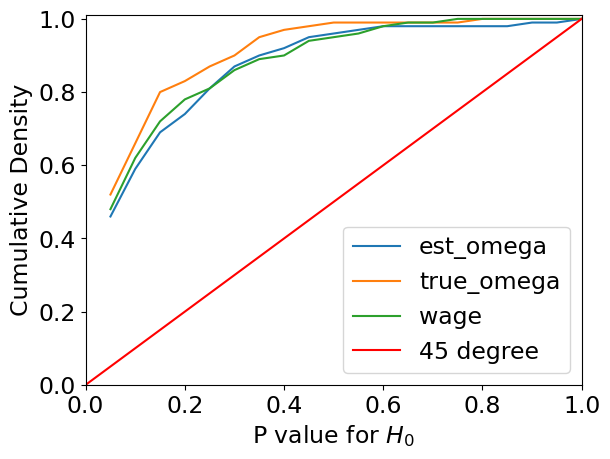

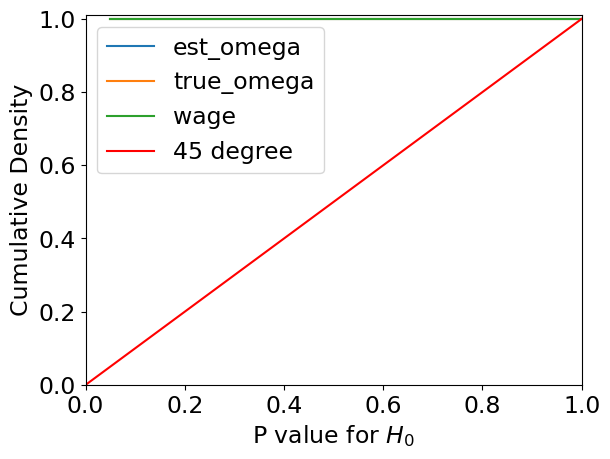

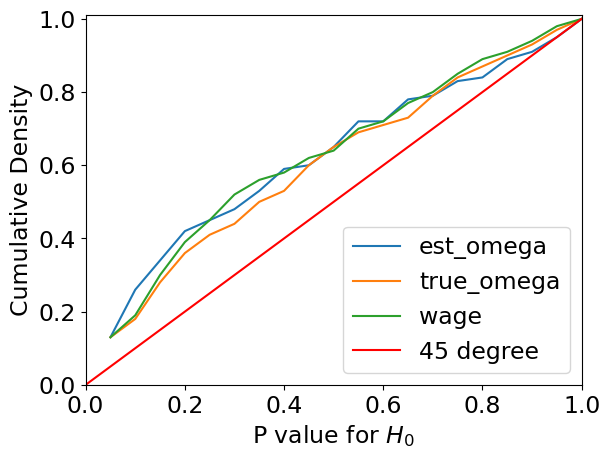

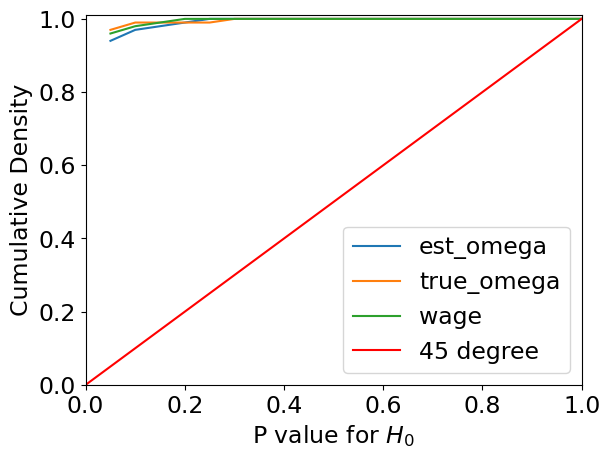

In [6]:
#TEST FOR HVORDAN VI BRUGER LØNSHOCK
j = 3 #0   #est shadow
im = 0 #love True=0, false = 1
fig_density_est_wage(TrueNC_testNC_woman[j,0,im,:],TrueNC_testNC_woman[j,1,im,:],TrueNC_testNC_woman[j,2,im,:])
fig_density_est_wage(TrueFC_testNC_woman[j,0,im,:],TrueFC_testNC_woman[j,1,im,:],TrueFC_testNC_woman[j,2,im,:])
fig_density_est_wage(TrueLC_testNC_woman[j,0,im,:],TrueLC_testNC_woman[j,1,im,:],TrueLC_testNC_woman[j,2,im,:])

fig_density_est_wage(TrueNC_testFC_woman[j,0,im,:],TrueNC_testFC_woman[j,1,im,:],TrueNC_testFC_woman[j,2,im,:])
fig_density_est_wage(TrueFC_testFC_woman[j,0,im,:],TrueFC_testFC_woman[j,1,im,:],TrueFC_testFC_woman[j,2,im,:])
fig_density_est_wage(TrueLC_testFC_woman[j,0,im,:],TrueLC_testFC_woman[j,1,im,:],TrueLC_testFC_woman[j,2,im,:])
# DE ER NOGENLUNDE ENS

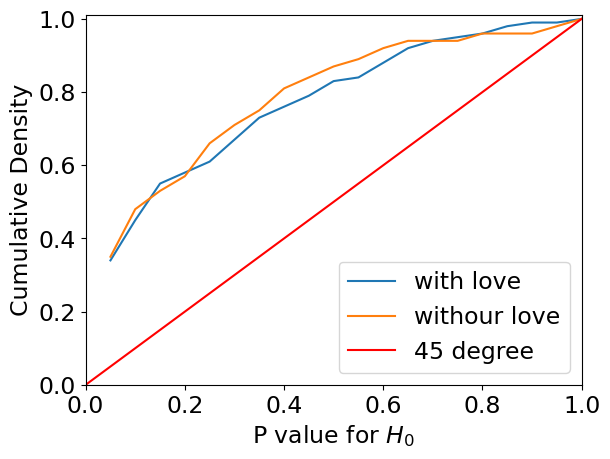

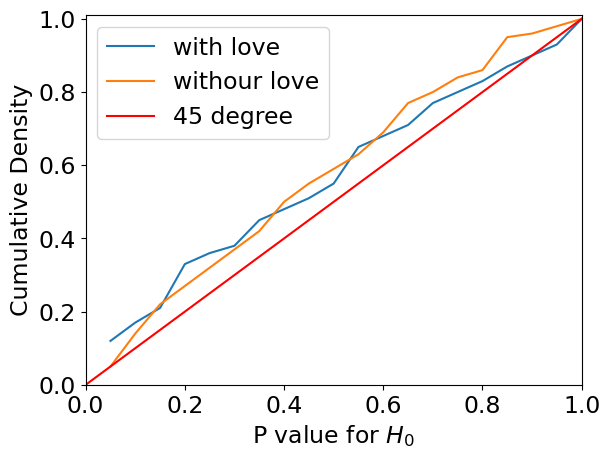

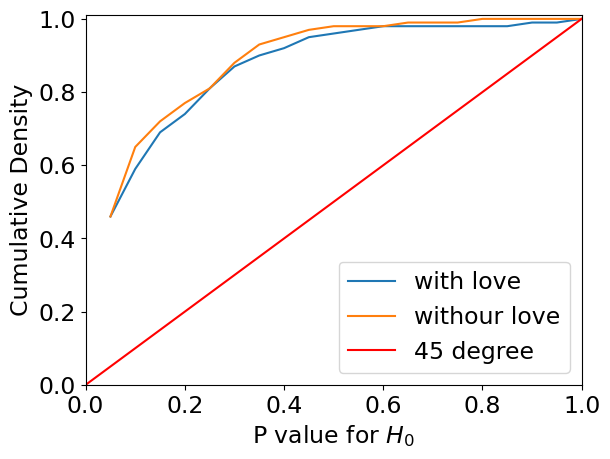

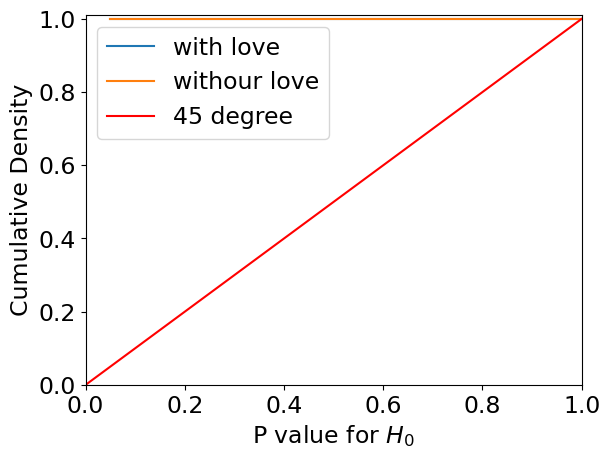

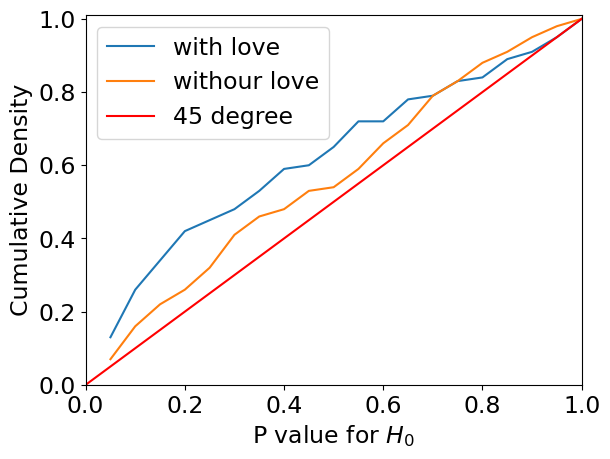

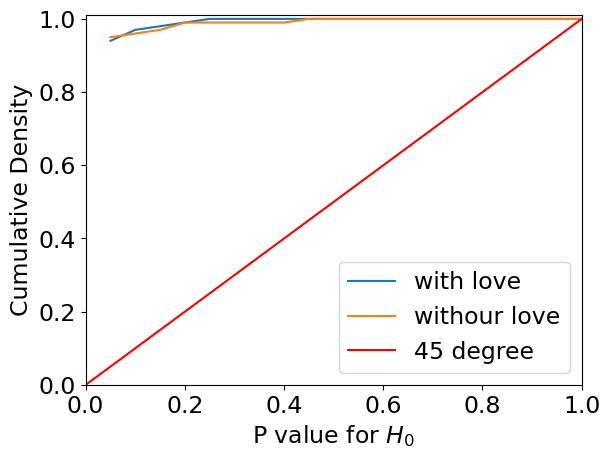

In [7]:
# LOVE

j = 3  #0  #est shadow
ik = 0  # est wage ["est_omega","true_omega", "wage"]
fig_density_love(TrueNC_testNC_woman[j,ik,0,:],TrueNC_testNC_woman[j,ik,1,:])
fig_density_love(TrueFC_testNC_woman[j,ik,0,:],TrueFC_testNC_woman[j,ik,1,:])
fig_density_love(TrueLC_testNC_woman[j,ik,0,:],TrueLC_testNC_woman[j,ik,1,:])


fig_density_love(TrueNC_testFC_woman[j,ik,0,:],TrueNC_testFC_woman[j,ik,1,:])
fig_density_love(TrueFC_testFC_woman[j,ik,0,:],TrueFC_testFC_woman[j,ik,1,:])
fig_density_love(TrueLC_testFC_woman[j,ik,0,:],TrueLC_testFC_woman[j,ik,1,:])

#LOVE GØR IKKE DEN STORE FORSKEL

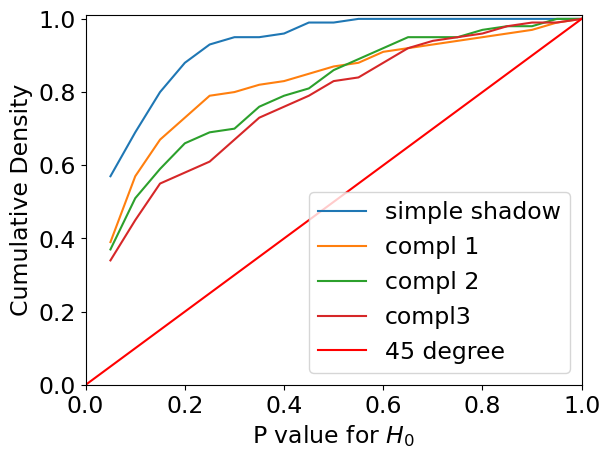

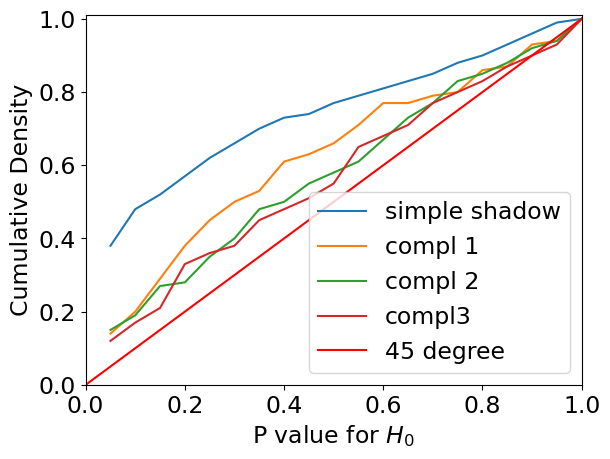

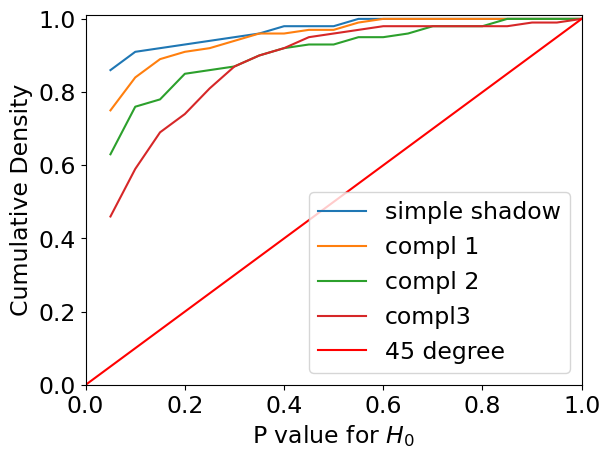

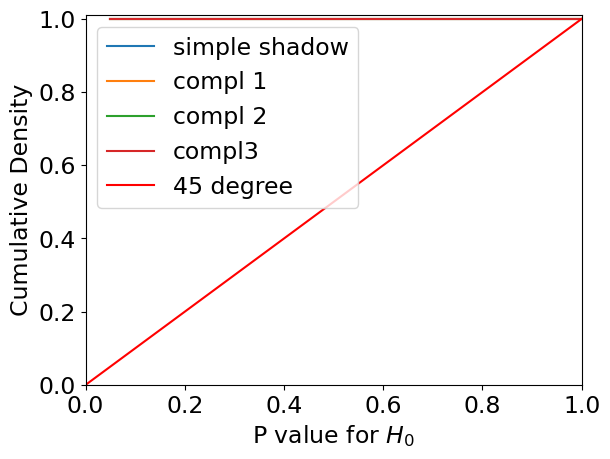

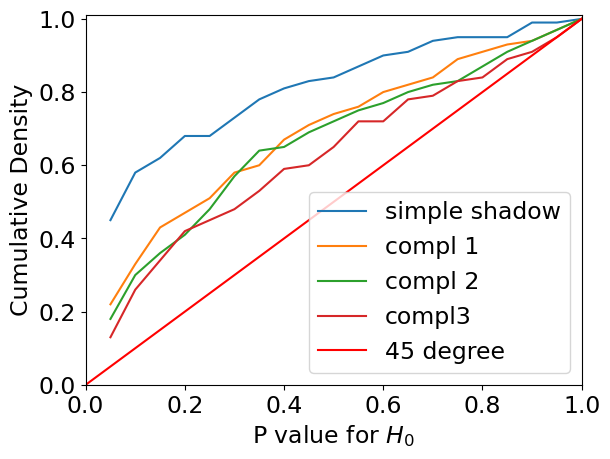

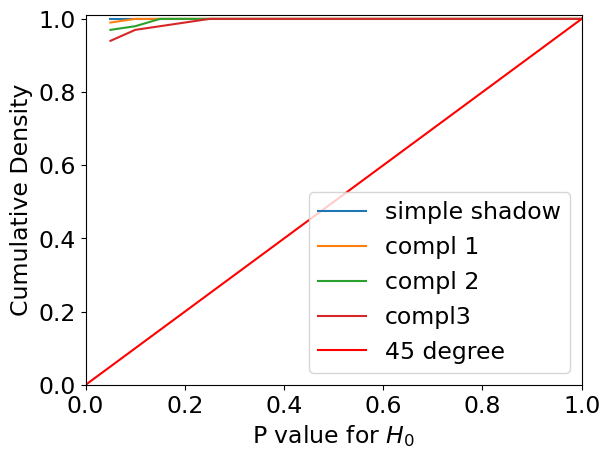

In [8]:
#TEST SHADOW

ik = 0  # est wage ["est_omega","true_omega", "wage"]
im = 0 #love True=0, false = 1
fig_density_shadow(TrueNC_testNC_woman[0,ik,im,:], TrueNC_testNC_woman[1,ik,im,:], TrueNC_testNC_woman[2,ik,im,:],TrueNC_testNC_woman[3,ik,im,:])
fig_density_shadow(TrueFC_testNC_woman[0,ik,im,:], TrueFC_testNC_woman[1,ik,im,:], TrueFC_testNC_woman[2,ik,im,:],TrueFC_testNC_woman[3,ik,im,:])
fig_density_shadow(TrueLC_testNC_woman[0,ik,im,:], TrueLC_testNC_woman[1,ik,im,:], TrueLC_testNC_woman[2,ik,im,:],TrueLC_testNC_woman[3,ik,im,:])

fig_density_shadow(TrueNC_testFC_woman[0,ik,im,:], TrueNC_testFC_woman[1,ik,im,:], TrueNC_testFC_woman[2,ik,im,:],TrueNC_testFC_woman[3,ik,im,:])
fig_density_shadow(TrueFC_testFC_woman[0,ik,im,:], TrueFC_testFC_woman[1,ik,im,:], TrueFC_testFC_woman[2,ik,im,:],TrueFC_testFC_woman[3,ik,im,:])
fig_density_shadow(TrueLC_testFC_woman[0,ik,im,:], TrueLC_testFC_woman[1,ik,im,:], TrueLC_testFC_woman[2,ik,im,:],TrueLC_testFC_woman[3,ik,im,:])

#DENNE ER RET VIGTIG!

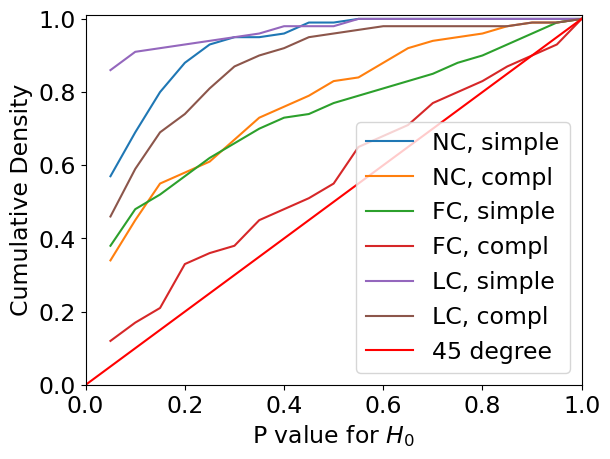

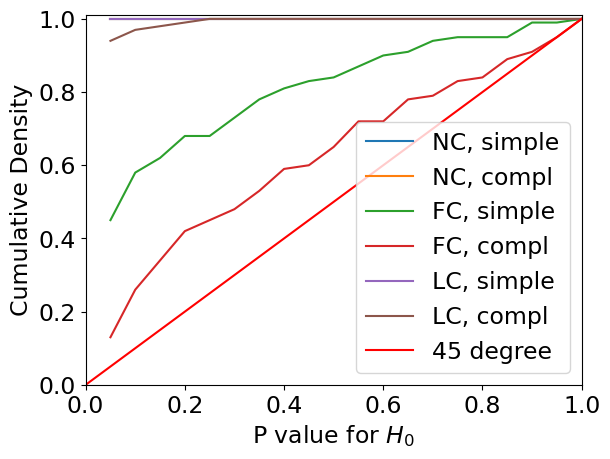

In [9]:
#TRUE MODEL OG SHADOW I EN!  (6 stk i en)

def fig_density_model_shadow(NC_simple, NC_compl, FC_simple, FC_compl,LC_simple, LC_compl):



    hist, bins = np.histogram(NC_simple, range = [0, 1], bins =20, density = True)
    hist = hist/20

    cumhist1 = np.cumsum(hist)


    hist, bins = np.histogram(NC_compl, range = [0, 1], bins =20, density = True)
    hist = hist/20
    cumhist2 = np.cumsum(hist)


    hist, bins = np.histogram(FC_simple, range = [0, 1], bins =20, density = True)
    hist = hist/20
    cumhist3 = np.cumsum(hist)


    hist, bins = np.histogram(FC_compl, range = [0, 1], bins =20, density = True)
    hist = hist/20
    cumhist4 = np.cumsum(hist)



    hist, bins = np.histogram(LC_simple, range = [0, 1], bins =20, density = True)
    hist = hist/20
    cumhist5 = np.cumsum(hist)


    hist, bins = np.histogram(LC_compl, range = [0, 1], bins =20, density = True)
    hist = hist/20
    cumhist6 = np.cumsum(hist)


    plt.plot(bins[1:], cumhist1, label="NC, simple")
    plt.plot(bins[1:], cumhist2, label="NC, compl ")
    plt.plot(bins[1:], cumhist3, label="FC, simple")
    plt.plot(bins[1:], cumhist4, label="FC, compl")
    plt.plot(bins[1:], cumhist5, label="LC, simple")
    plt.plot(bins[1:], cumhist6, label="LC, compl")
    plt.plot(np.linspace(0.0,1.0, 10), np.linspace(0.0,1.0,10), label = "45 degree", color = 'red')
    plt.xlabel(f'P value for $H_0$')
    #plt.axvline(x= 0.05, color = 'red')
    plt.ylabel('Cumulative Density')
    plt.legend()
    plt.ylim(0,1.01)
    plt.xlim(0,1)
    #plt.savefig(f'output/Wald__TRUE{model_True}_{gender}_N{models.par.simN}_{save_fig}.png')
    plt.show()


ik = 0  # est wage ["est_omega","true_omega", "wage"]
im = 0 #love True=0, false = 1

fig_density_model_shadow(TrueNC_testNC_woman[0,ik,im,:],TrueNC_testNC_woman[3,ik,im,:],TrueFC_testNC_woman[0,ik,im,:],TrueFC_testNC_woman[3,ik,im,:],TrueLC_testNC_woman[0,ik,im,:],TrueLC_testNC_woman[3,ik,im,:])
fig_density_model_shadow(TrueNC_testFC_woman[0,ik,im,:],TrueNC_testFC_woman[3,ik,im,:],TrueFC_testFC_woman[0,ik,im,:],TrueFC_testFC_woman[3,ik,im,:],TrueLC_testFC_woman[0,ik,im,:],TrueLC_testFC_woman[3,ik,im,:])